In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import ipywidgets as widgets
from sympy import Symbol

%matplotlib widget

In [2]:
ftfs = np.load("methane_trans.npy")

In [3]:
gas = "Methane"
trans0 = np.load(f"{gas}_trans.npy")
mask = ~np.all(trans0==0,axis=1)
trans = trans0[mask]

f_max = trans[:, 1].real
v_max = np.abs(trans[:, 2])
angle_max = np.angle(trans[:, 2], deg=True)

# Modelling the amplitude.

## Rational function

IntSlider(value=0, max=10)

IntSlider(value=0, max=10)

Output()

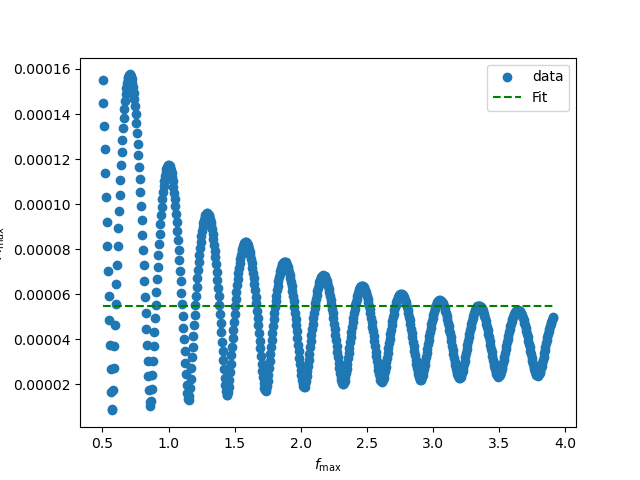

In [5]:
def func1(x, degree_num, degree_den, *coeffs):
    num = sum( [coeffs[i] * x**i for i in range(degree_num + 1)] )
    den = sum( [coeffs[i+(degree_num+1)] * x**i for i in range(degree_den+1)] )
    return num / den

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# https://stackoverflow.com/questions/78178330/updating-multiple-plots-in-jupyter-notebook-when-a-slider-value-changes
# https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Events.html#Example
# https://stackoverflow.com/questions/4098131/how-to-update-a-plot-in-matplotlib
# Code generated with the help of ChatGPT as well.

degree_num = 0
degree_den = 0

# Create figure once
fig, ax = plt.subplots()
line_data = ax.scatter(f_max, v_max, label='data')
line_fit, = ax.plot([], [], 'g--', label='Fit')

ax.set_xlabel(r'$f_\text{max}$')
ax.set_ylabel(r'$A_\text{max}$')    
ax.legend()

def on_value_change(degree_num, degree_den):
    p0 = np.ones(degree_num+degree_den+2)
    popt, pcov = curve_fit(lambda x, *p0 : func1(x, degree_num, degree_den, *p0), f_max, v_max, p0=p0)

    display(popt)
    
    rounded_popt = [round(p, 5) for p in popt]
    x = Symbol("x")
    display(func1(x, degree_num, degree_den, *rounded_popt))

    line_fit.set_xdata(f_max)

    line_fit.set_ydata( [func1(f_max[i], degree_num, degree_den, *popt) for i in range(len(f_max))] )
    fig.canvas.draw_idle()
    
w_degree_num = widgets.IntSlider(value=0, min=0, max=10)
w_degree_den = widgets.IntSlider(value=0, min=0, max=10)
    
out = widgets.interactive_output(on_value_change, {"degree_num": w_degree_num, "degree_den": w_degree_den} )

display(w_degree_num, w_degree_den, out)

## Arbitrary function

C:\Users\20223097\AppData\Local\Temp\ipykernel_17736\3354031795.py:20: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(func1, f_max, v_max, p0=p0)


array([-1.83746389e+03,  8.41557048e-04,  1.83661920e-01,  2.00484570e+01,
        1.07098649e-04, -3.30398051e-01])

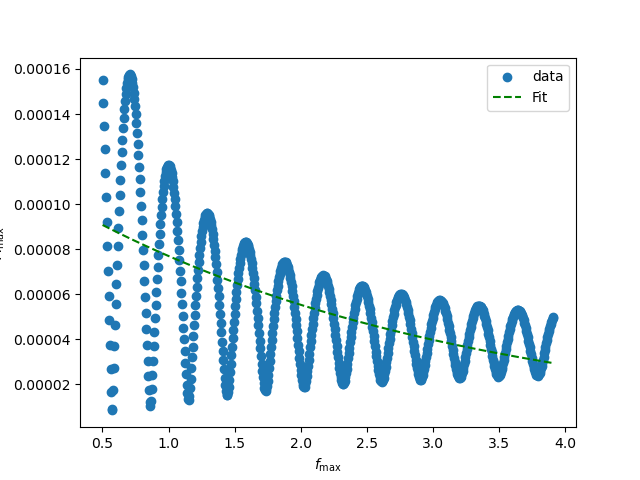

In [95]:
def func1(x, A,B,C,D,E,F):
    return np.exp(A)*(B+C*np.sin(D*x)) + E * np.exp(F*x) 

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# https://stackoverflow.com/questions/78178330/updating-multiple-plots-in-jupyter-notebook-when-a-slider-value-changes
# https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Events.html#Example
# https://stackoverflow.com/questions/4098131/how-to-update-a-plot-in-matplotlib
# Code generated with the help of ChatGPT as well.

# Create figure once
fig, ax = plt.subplots()
line_data = ax.scatter(f_max, v_max, label='data')

ax.set_xlabel(r'$f_\text{max}$')
ax.set_ylabel(r'$A_\text{max}$')    
ax.legend()


p0 = [-1,  0.00004,  0.0001,  20,  -0.1,  -0.001]
popt, pcov = curve_fit(func1, f_max, v_max, p0=p0)

display(popt)

fit = [func1(f_max[i], *popt) for i in range(len(f_max))]
ax.plot(f_max, fit, 'g--', label='Fit')
ax.legend()

# Modelling the Phase

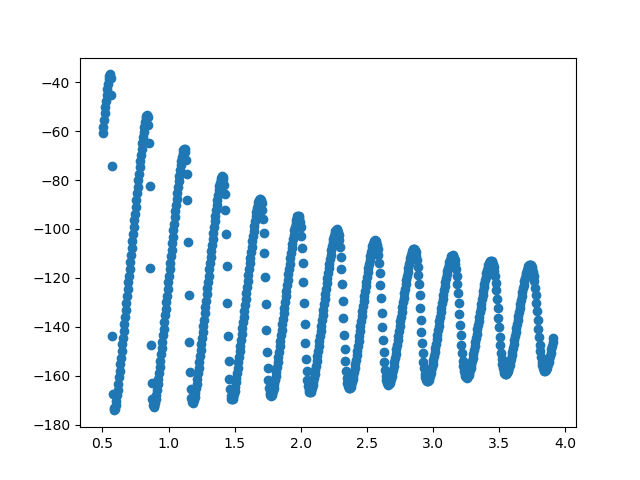

In [6]:
# Get one window.
plt.figure()
plt.scatter(f_max, angle_max)

In [80]:
# indices = [i for i in range(len(f_max)) if ( (f_max[i]>=117.5) and (f_max[i]<=175) )]
indices = range(len(f_max))
f_max_restricted = [f_max[i] for i in indices]
angle_max_restricted = [angle_max[i] for i in indices]

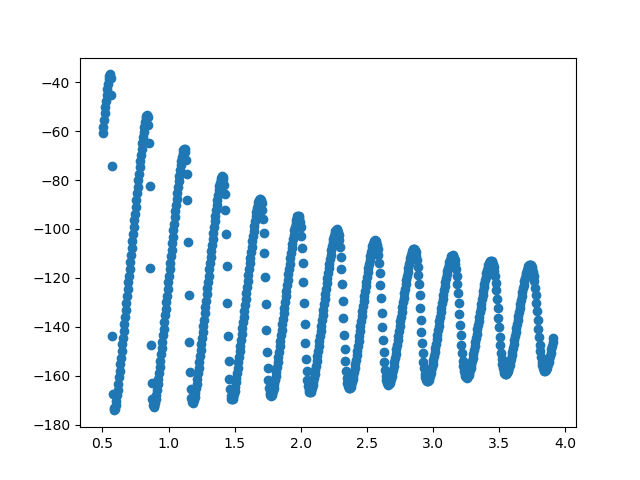

In [81]:
plt.figure()
plt.scatter(f_max_restricted, angle_max_restricted)

In [9]:
def func2(x, A,B,C,D):
    return A + (B / (1+np.exp(-C*(x-D))))

C:\Users\20223097\AppData\Local\Temp\ipykernel_17736\1553840072.py:9: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(func2, f_max_restricted, angle_max_restricted, p0=p0)


array([-128.6333781,    1.       ,    1.       ,  145.       ])

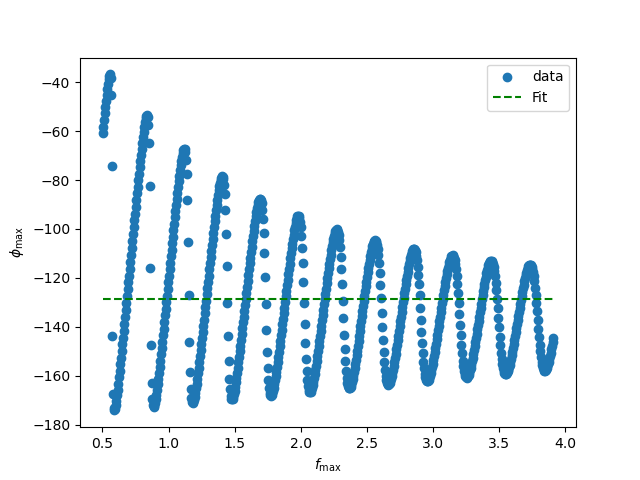

In [82]:
# Create figure once
fig, ax = plt.subplots()
line_data = ax.scatter(f_max_restricted, angle_max_restricted, label='data')

ax.set_xlabel(r'$f_\text{max}$')
ax.set_ylabel(r'$\phi_\text{max}$')    

p0 = [1,1,1,145]
popt, pcov = curve_fit(func2, f_max_restricted, angle_max_restricted, p0=p0)

display(popt)

fit = [func2(f_max_restricted[i], *popt) for i in range(len(f_max_restricted))]
ax.plot(f_max_restricted, fit, 'g--', label='Fit')
ax.legend()

